In [1]:
from datasets import load_dataset
ds = load_dataset("codeparrot/apps", split="train", trust_remote_code=True)
ds

/home/ell/bigcode-evaluation-harness/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['problem_id', 'question', 'solutions', 'input_output', 'difficulty', 'url', 'starter_code'],
    num_rows: 5000
})

In [35]:
dp = ds.to_pandas()

In [60]:
dp.iloc[:1]

,problem_id,question,solutions,input_output,difficulty,url,starter_code
0,0,Polycarp has $n$ different binary words. A wor...,"[""for _ in range(int(input())):\n n = int(i...","{\n ""inputs"": [\n ""4\n4\n0001\n1000\n0011\...",interview,https://codeforces.com/problemset/problem/1259/D,


In [ ]:
import re 

def format_instruction(sample):
    """Format the data into a prompt template"""
    return f"""{sample['question']}

    {re.findall(r'\".*\"', sample['solutions'])[0]}
    """
    


In [ ]:
import re 

len(re.findall(r'\".*\"', ds[0]['solutions']))



1

In [48]:
[len(re.findall(r'\".*\"', x)) for x in  ds["solutions"]]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


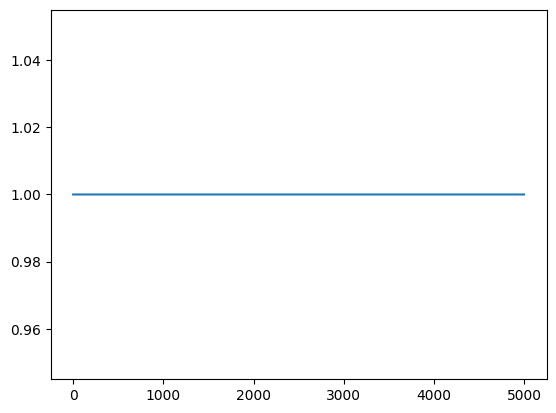

In [50]:
from matplotlib import pyplot as plt

plt.plot([len(re.findall(r'\".*\"', x)) for x in  ds["solutions"]])

In [ ]:
ds[0]['solutions']

'["for _ in range(int(input())):\\n    n = int(input())\\n    mass = []\\n    zo = 0\\n    oz = 0\\n    zz = 0\\n    oo = 0\\n    ozs = []\\n    zos = []\\n    ozss = set()\\n    zoss = set()\\n    for j in range(n):\\n        k = input()\\n        mass.append(k)\\n        if k[0] == \'0\' and k[-1] == \'1\':\\n            zoss.add(k)\\n            zos.append(j + 1)\\n            zo += 1\\n        elif k[0] == \'1\' and k[-1] == \'0\':\\n            ozss.add(k)\\n            ozs.append(j + 1)\\n            oz += 1\\n        elif k[0] == \'0\' and k[-1] == \'0\':\\n            zz += 1\\n        else:\\n            oo += 1\\n    if zz and oo and not oz and not zo:\\n        print(-1)\\n        continue\\n    else:\\n        if zo > oz:\\n            print((zo - oz) // 2)\\n            ans = []\\n            need = (zo - oz) // 2\\n            i = 0\\n            while need:\\n                zzz = mass[zos[i] - 1][len(mass[zos[i] - 1]) - 1:: -1]\\n                if zzz not in ozss:\\n  

In [20]:
format_instruction(ds[0])

'Polycarp has $n$ different binary words. A word called binary if it contains only characters \'0\' and \'1\'. For example, these words are binary: "0001", "11", "0" and "0011100".\n\nPolycarp wants to offer his set of $n$ binary words to play a game "words". In this game, players name words and each next word (starting from the second) must start with the last character of the previous word. The first word can be any. For example, these sequence of words can be named during the game: "0101", "1", "10", "00", "00001".\n\nWord reversal is the operation of reversing the order of the characters. For example, the word "0111" after the reversal becomes "1110", the word "11010" after the reversal becomes "01011".\n\nProbably, Polycarp has such a set of words that there is no way to put them in the order correspondent to the game rules. In this situation, he wants to reverse some words from his set so that:  the final set of $n$ words still contains different words (i.e. all words are unique)

In [50]:
dp.iloc[0]["question"].replace("\\'", "'")

'Polycarp has $n$ different binary words. A word called binary if it contains only characters \'0\' and \'1\'. For example, these words are binary: "0001", "11", "0" and "0011100".\n\nPolycarp wants to offer his set of $n$ binary words to play a game "words". In this game, players name words and each next word (starting from the second) must start with the last character of the previous word. The first word can be any. For example, these sequence of words can be named during the game: "0101", "1", "10", "00", "00001".\n\nWord reversal is the operation of reversing the order of the characters. For example, the word "0111" after the reversal becomes "1110", the word "11010" after the reversal becomes "01011".\n\nProbably, Polycarp has such a set of words that there is no way to put them in the order correspondent to the game rules. In this situation, he wants to reverse some words from his set so that:  the final set of $n$ words still contains different words (i.e. all words are unique)

In [57]:
len(dp.iloc[0]["solutions"].split('\",\"'))

1

In [43]:
print("AA \\n BB".replace("\\n", "\n"))

AA 
 BB
